In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\admin'

In [4]:
os.chdir(r"C:\Users\admin\Downloads\archive")

In [5]:
df=pd.read_csv("creditcard.csv")

In [6]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344


In [12]:
df.shape

(284807, 31)

In [13]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
fraud_cases=len(df[df['Class']==1])

In [15]:
print('Number of Fraud Cases:',fraud_cases)

Number of Fraud Cases: 492


In [16]:
non_fraud_cases=len(df[df['Class']==0])

In [17]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 284315


In [18]:
fraud=df[df['Class']==1]

In [19]:
genuine=df[df['Class']==0]

In [20]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [21]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

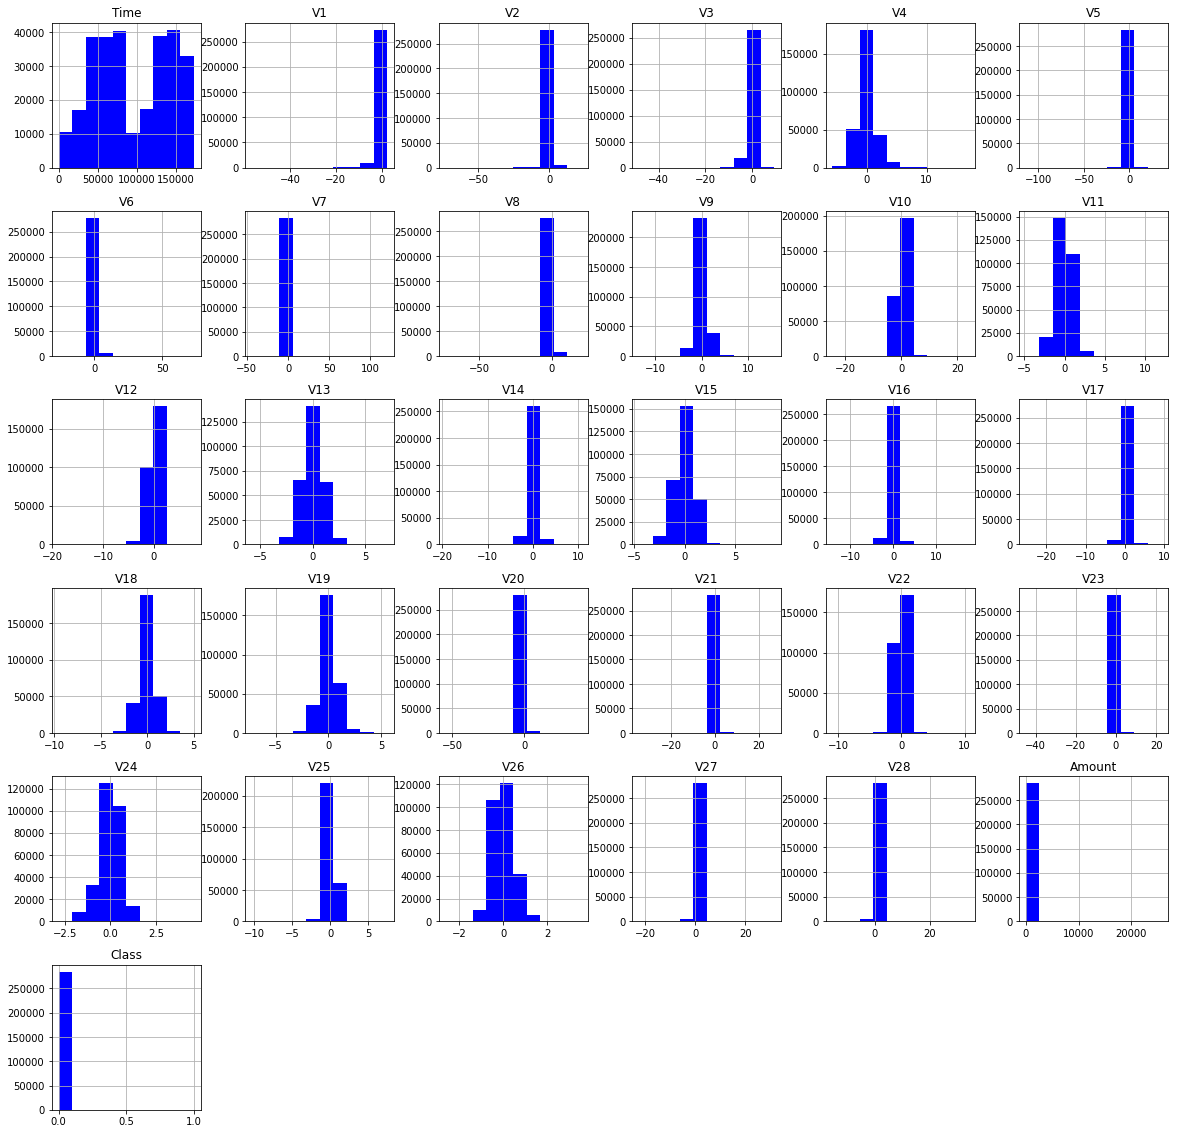

In [22]:
df.hist(figsize=(20,20),color='blue')
plt.show()

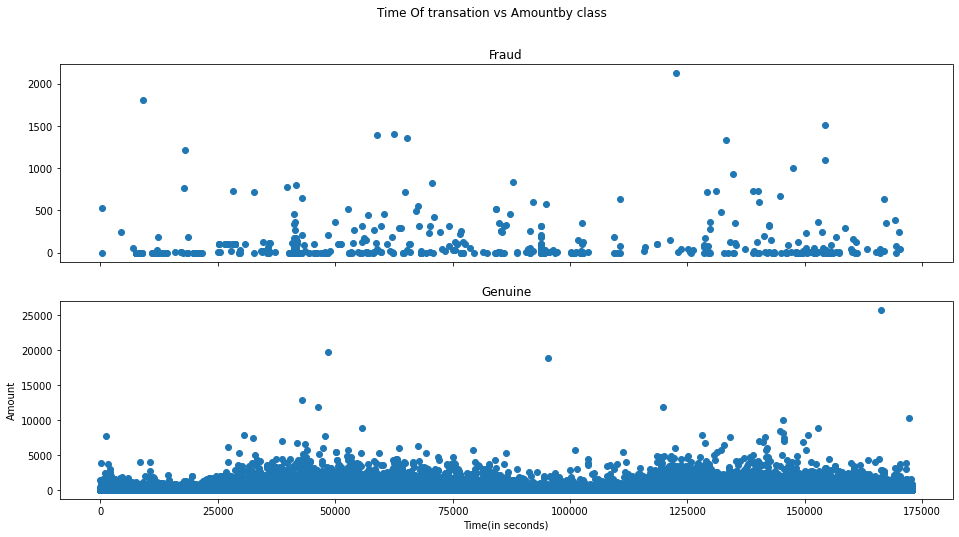

In [23]:
from pylab import rcParams
rcParams['figure.figsize']=16,8
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Time Of transation vs Amountby class')
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time,genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time(in seconds)')
plt.ylabel('Amount')
plt.show()

<AxesSubplot:>

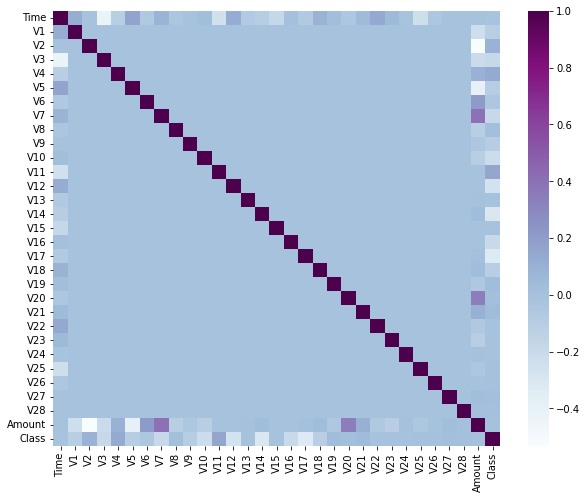

In [24]:
plt.figure(figsize=(10,8))
corr=df.corr()
sns.heatmap(corr,cmap='BuPu')

In [25]:
classes=df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

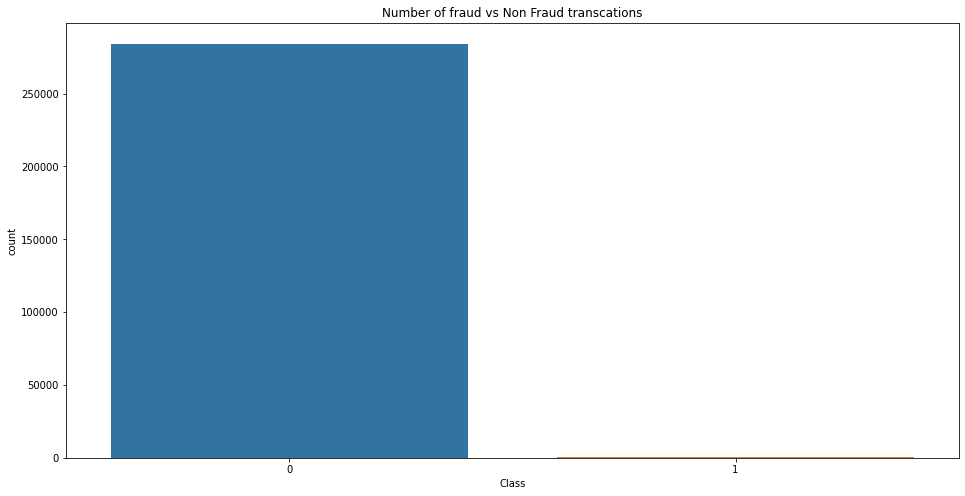

In [26]:
sns.countplot(x='Class',data=df)
plt.title('Number of fraud vs Non Fraud transcations')
plt.show()

In [27]:
normal_share=round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [28]:
fraud_share=round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

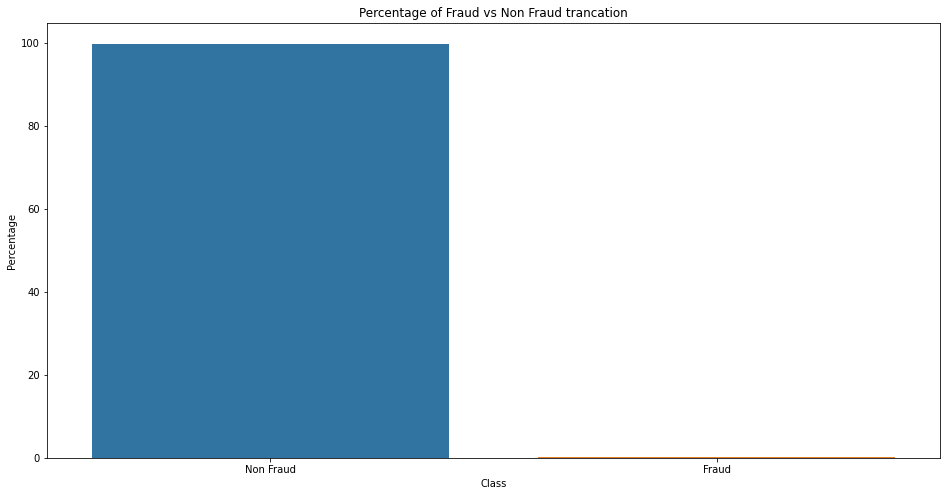

In [29]:
fraud_percetage={'Class':['Non Fraud','Fraud'],'Percentage':[normal_share,fraud_share]}
df_fraud_percentage=pd.DataFrame(fraud_percetage)
sns.barplot(x='Class',y='Percentage',data=df_fraud_percentage)
plt.title('Percentage of Fraud vs Non Fraud trancation')
plt.show()

In [30]:
x=df.drop(['Class'],axis=1)

In [31]:
y=df['Class']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [33]:
scaler=StandardScaler()

In [34]:
x_train['Amount']=scaler.fit_transform(x_train[['Amount']])

In [35]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7610,10529.0,1.160485,0.010653,0.731921,-0.083757,-0.204162,0.309873,-0.503116,0.130077,1.279474,...,-0.109200,-0.167768,-0.142183,0.148065,-0.261307,-0.052688,0.904879,-0.061990,-0.012372,-0.354837
190214,128741.0,2.054237,-0.078678,-1.233161,0.183785,0.187539,-0.605905,0.102048,-0.183363,0.245017,...,-0.169517,-0.263893,-0.636424,0.263862,-0.480128,-0.249245,0.206509,-0.072079,-0.074044,-0.350715
130590,79387.0,1.434517,-1.560173,-0.783968,-2.432927,0.578638,3.528638,-1.814737,0.859190,-1.680052,...,-0.068984,-0.020924,0.089320,-0.120671,1.009913,0.510411,-0.038200,0.047306,0.031218,-0.067744
247916,153735.0,-0.112311,1.235492,-0.312905,-0.502613,0.699869,-1.028247,0.964615,-0.112966,0.082123,...,0.135098,-0.334646,-0.734681,0.161824,0.984857,-0.439226,0.093359,0.332998,0.149541,-0.352316
55518,46986.0,1.123477,-0.093882,0.988880,0.533433,-0.769281,-0.068741,-0.575773,0.257399,0.235960,...,-0.170440,-0.003975,-0.052800,0.145628,0.219496,0.000863,0.215796,0.000743,0.013160,-0.331903


In [36]:
x_test['Amount']=scaler.fit_transform(x_test[['Amount']])
x_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,43906.0,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.339144
154704,102638.0,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.319203
67247,52429.0,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.873923
251657,155444.0,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.343132
201903,134084.0,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.226360


In [37]:
cols=x_train.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

C:\Users\admin\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

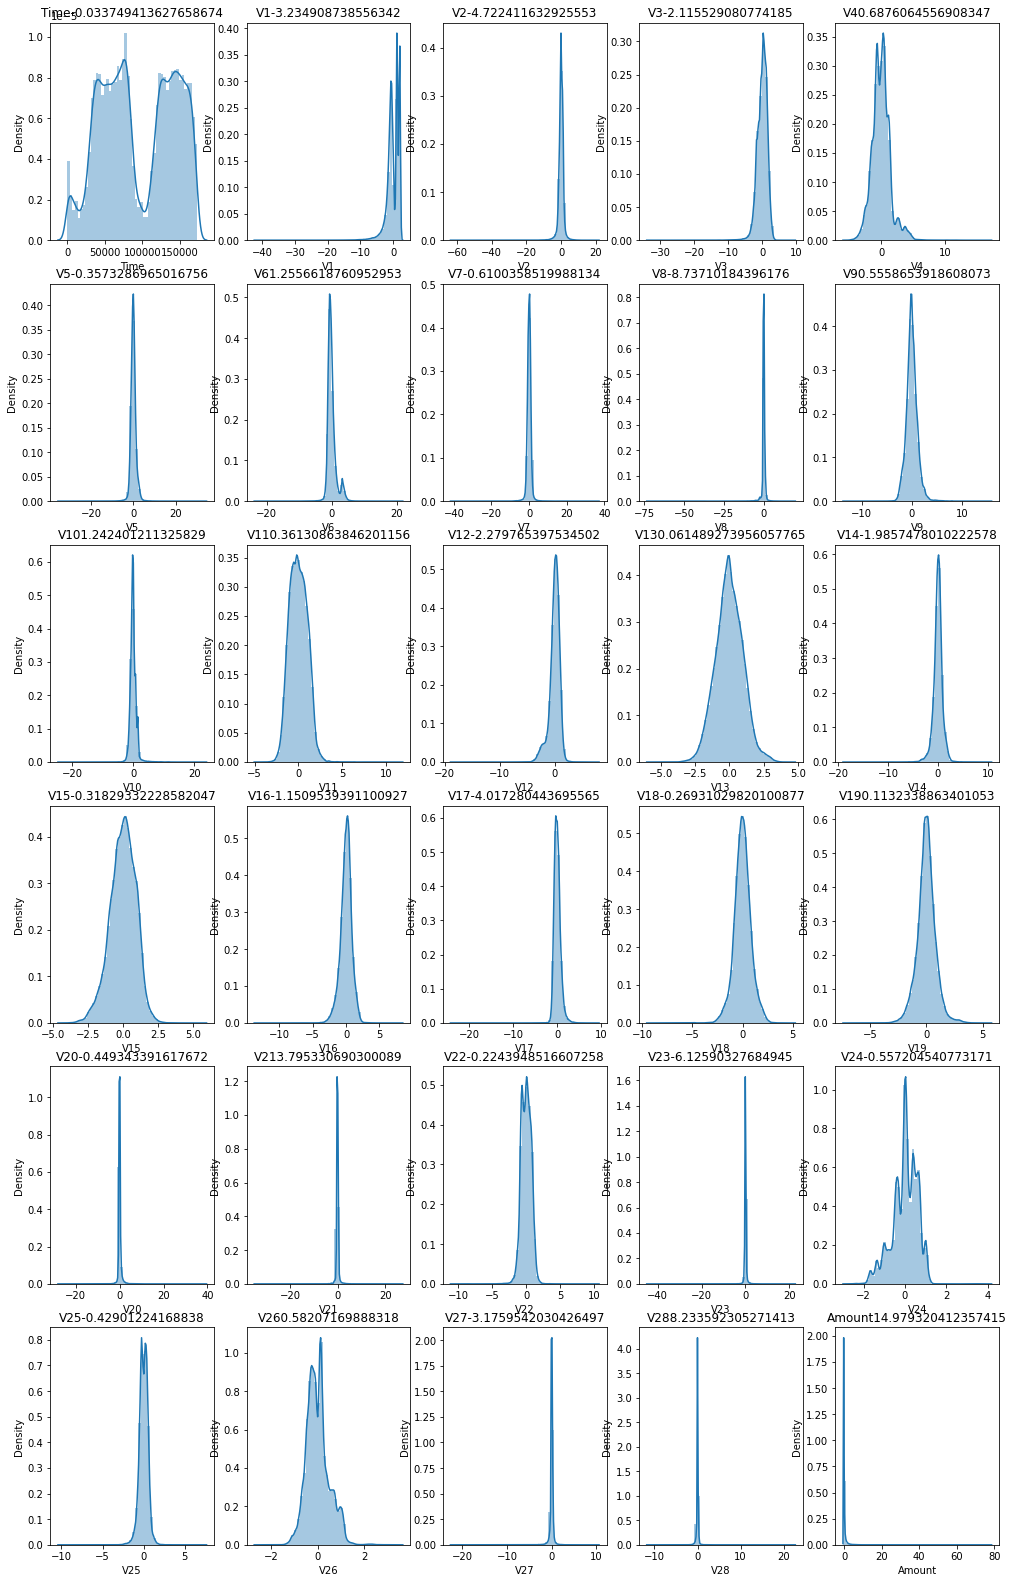

In [38]:
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(x_train[col])
    plt.title(col+''+str(x_train[col].skew()))

In [39]:
from sklearn.preprocessing import PowerTransformer

In [40]:
pt=PowerTransformer(method='yeo-johnson',standardize=True,copy=False)
x_train[cols]=pt.fit_transform(x_train)

In [41]:
x_test[cols]=pt.fit_transform(x_test)

C:\Users\admin\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

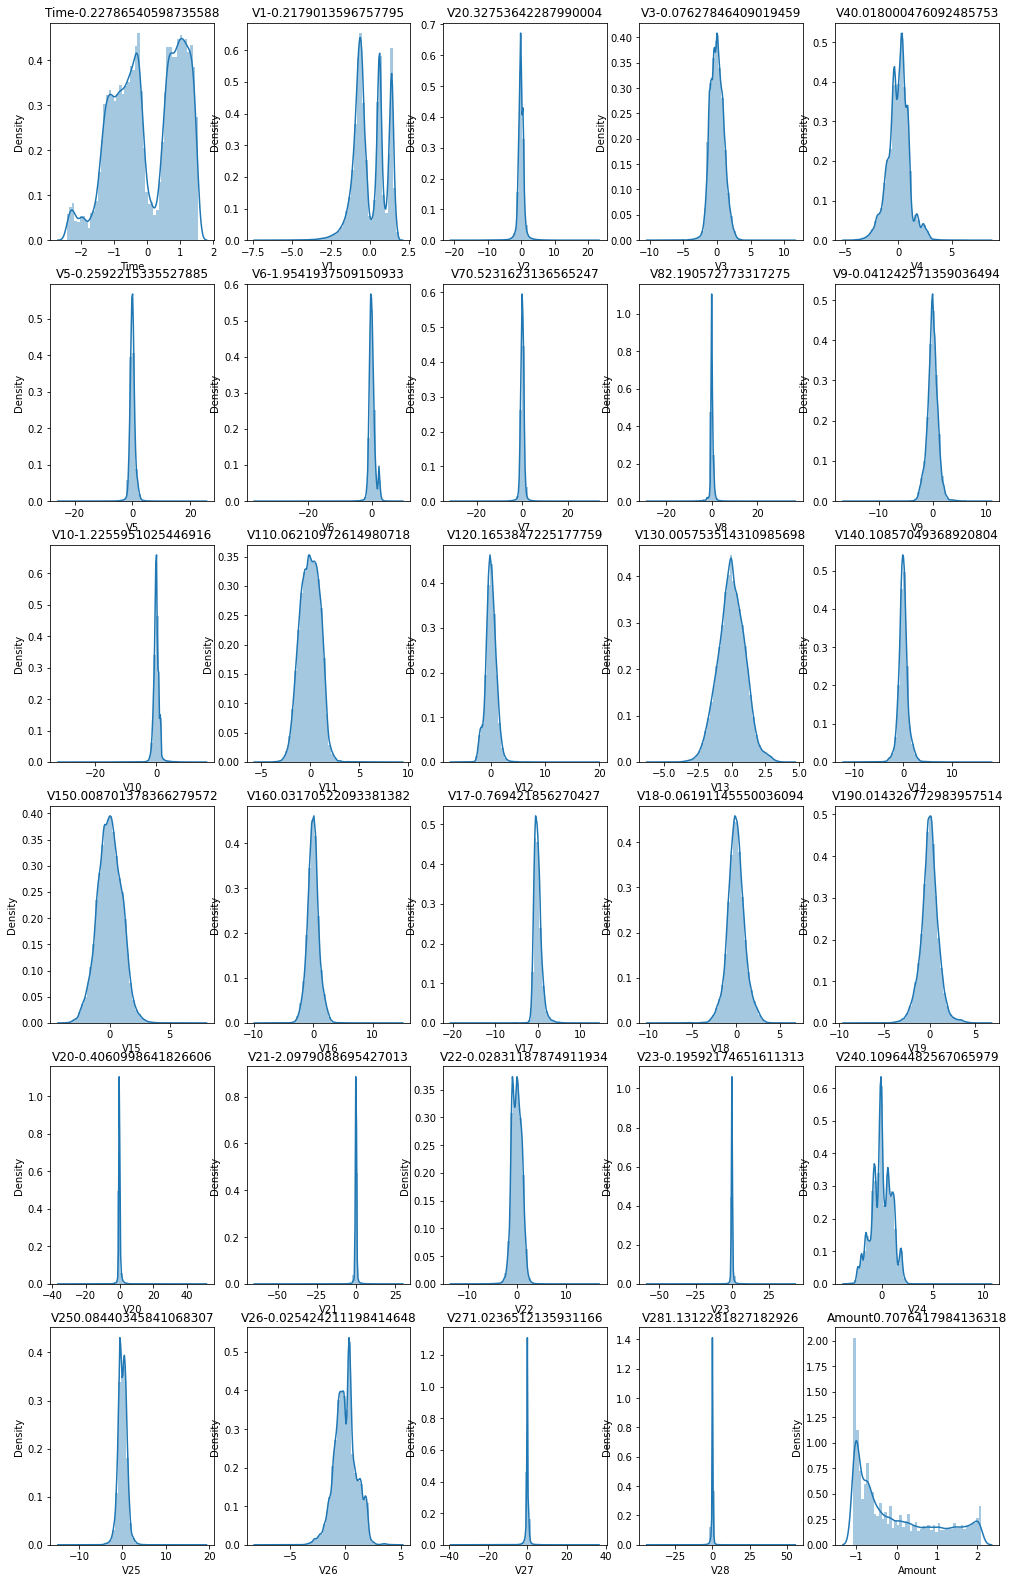

In [42]:
k=0
plt.figure(figsize=(17,28))
for col in cols:
    k=k+1
    plt.subplot(6,5,k)
    sns.distplot(x_train[col])
    plt.title(col+''+str(x_train[col].skew()))

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [44]:
log=LogisticRegression()
log_model=log.fit(x_train,y_train)
y_pred=log_model.predict(x_test)

In [45]:
confusion=metrics.confusion_matrix(y_test,y_pred)
confusion

array([[85280,    21],
       [   47,    95]], dtype=int64)

In [46]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [47]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Sensitivity:',TP/float(TP+FN))
print('Specificity:',TN/float(TN+FP))
print('F1-Score:',f1_score(y_test,y_pred))

Accuracy: 0.999204147794436
Sensitivity: 0.6690140845070423
Specificity: 0.999753812968195
F1-Score: 0.7364341085271319


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.82      0.67      0.74       142

    accuracy                           1.00     85443
   macro avg       0.91      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [49]:
random=RandomForestClassifier()
random_model=random.fit(x_train,y_train)
y_pred=random_model.predict(x_test)

In [50]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Sensitivity:',TP/float(TP+FN))
print('Specificity:',TN/float(TN+FP))
print('F1-Score:',f1_score(y_test,y_pred))

Accuracy: 0.999403110845827
Sensitivity: 0.6690140845070423
Specificity: 0.999753812968195
F1-Score: 0.8089887640449438


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.86      0.76      0.81       142

    accuracy                           1.00     85443
   macro avg       0.93      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [52]:
tree=DecisionTreeRegressor()
tree_model=tree.fit(x_train,y_train)
y_pred=tree_model.predict(x_test)

In [53]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Sensitivity:',TP/float(TP+FN))
print('Specificity:',TN/float(TN+FP))
print('F1-Score:',f1_score(y_test,y_pred))

Accuracy: 0.9988764439450862
Sensitivity: 0.6690140845070423
Specificity: 0.999753812968195
F1-Score: 0.6799999999999999


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.65      0.72      0.68       142

    accuracy                           1.00     85443
   macro avg       0.82      0.86      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [55]:
from xgboost import XGBClassifier

In [56]:
boost=XGBClassifier()
boost_model=boost.fit(x_train,y_train)
y_pred=boost_model.predict(x_test)

In [57]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Sensitivity:',TP/float(TP+FN))
print('Specificity:',TN/float(TN+FP))
print('F1-Score:',f1_score(y_test,y_pred))

Accuracy: 0.9995084442259752
Sensitivity: 0.6690140845070423
Specificity: 0.999753812968195
F1-Score: 0.8384615384615385


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.92      0.77      0.84       142

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

